# Visualizing Categorical Data

    - It is helpful to think of the different categorical plot kinds as belonging to three different families:
    - Categorical scatterplots - (stropplot()) , (swarmplot())
    - Categorical distribution plots - boxplot() , violinplot(), boxenplot()
    - Categorcial estimate plots - pointplot(), barplot(), countplot()

## Categorical Scatterplots

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


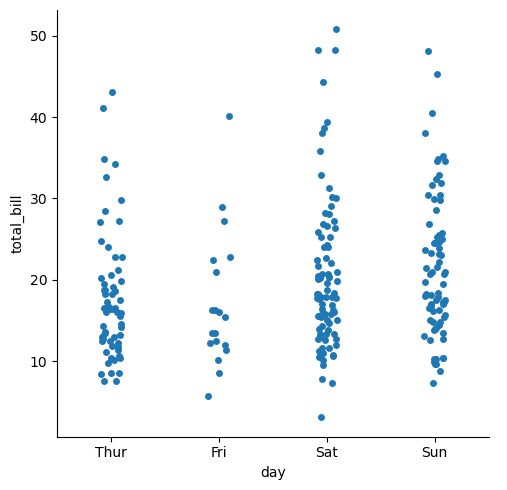

In [2]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


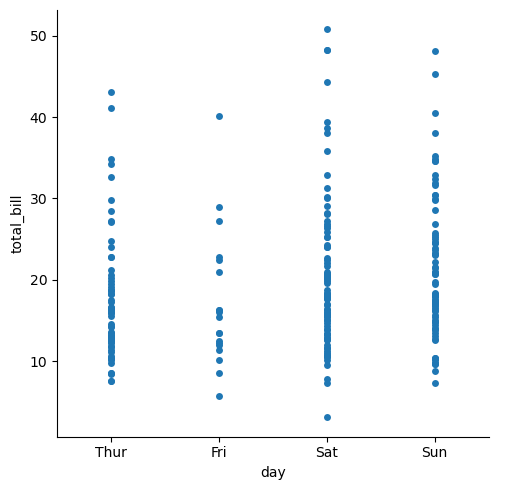

In [3]:
# jitter parameter controls the magnitude of jitter or disables it altogether:

sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


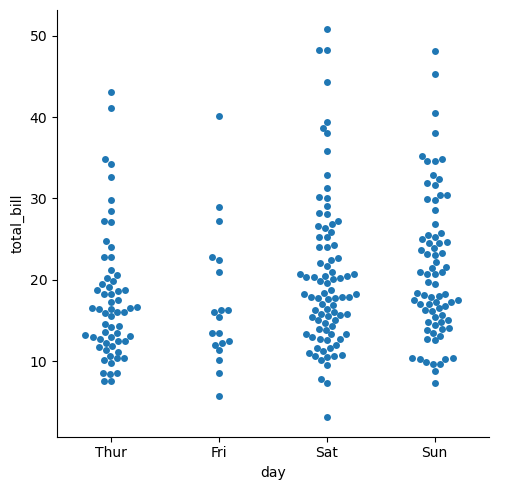

In [4]:
# The beeswarm approach prevents the points from overlapping:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


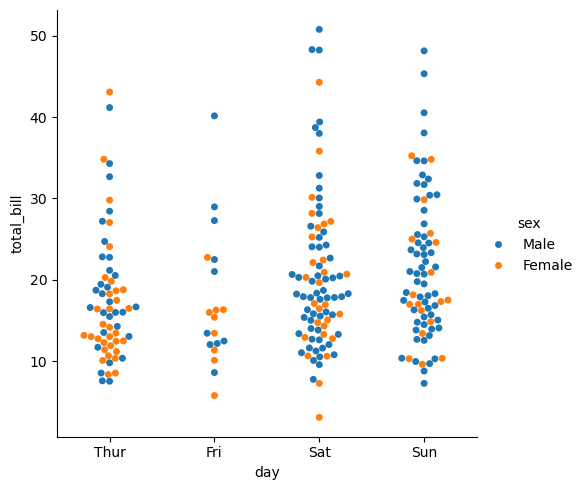

In [5]:
# Adding another dimension using the hue semantic:

sns.catplot(data=tips, x="day", y="total_bill", kind="swarm", hue="sex")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


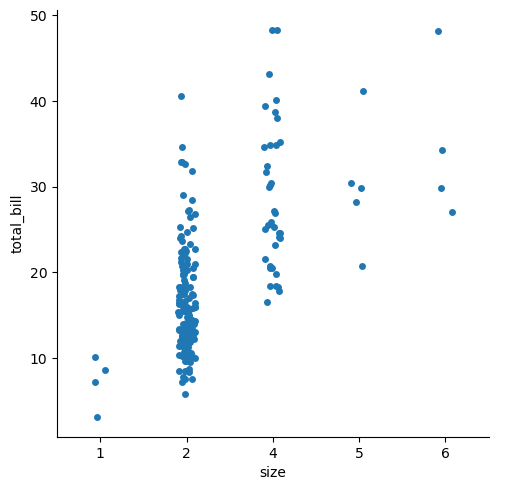

In [6]:
# Unlike in numerica data its not always obvious how to order the levels of the categorical variable along its axis:

sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill")

- all categorical plotting functions have a native_scale parameter, which can be set to True when you want to use numeric or datetime data for categorical grouping without changing the underlying data properties:

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


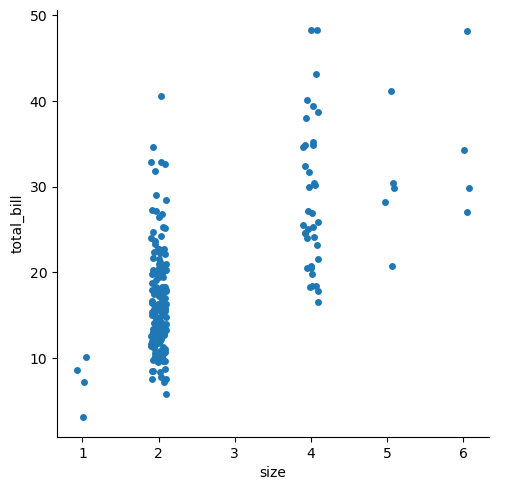

In [8]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill", native_scale=True)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


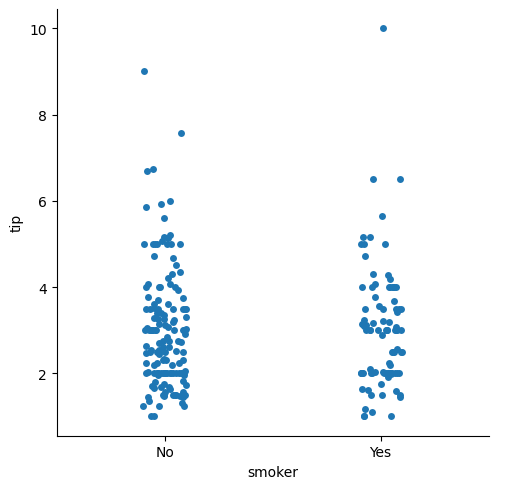

In [9]:
# Controlling ordering on a plot specific basis using the order parameter:

sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"])

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


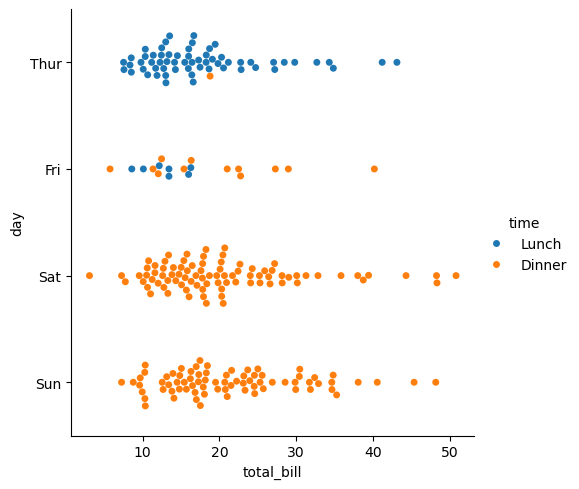

In [10]:
# Putting the categorical variable in a vertical axis:

sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

## Comparing Distributions

### BoxPlots

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


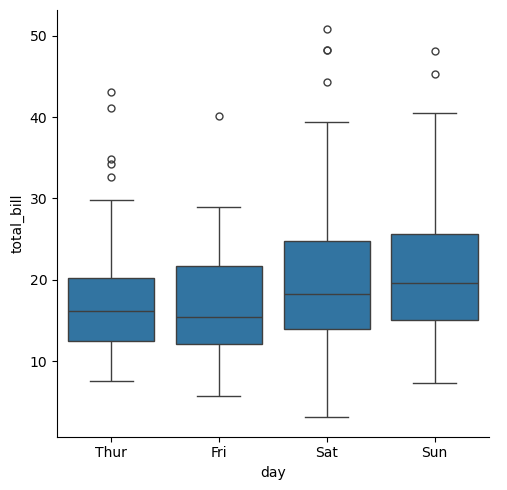

In [11]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


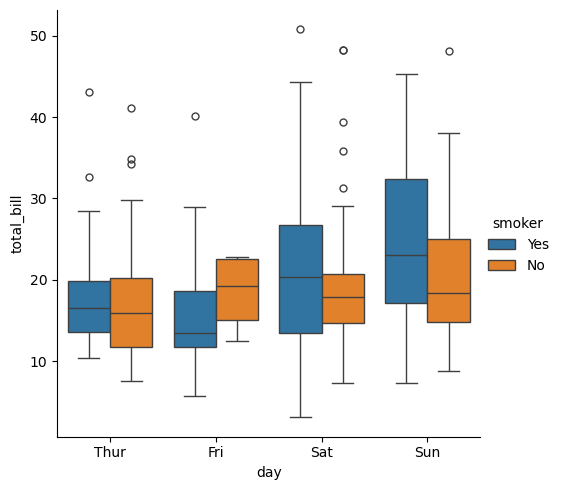

In [12]:
# When adding hue semantic, the box for each level of the semantic variable is made narrower and shifted along the categorical axis:

sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


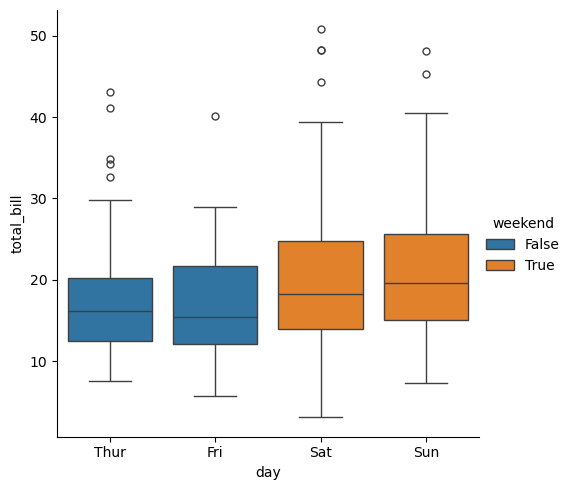

In [13]:
# Elements only dodge if they would otherwise overplap:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(data=tips, x="day", y="total_bill", hue="weekend", kind="box")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


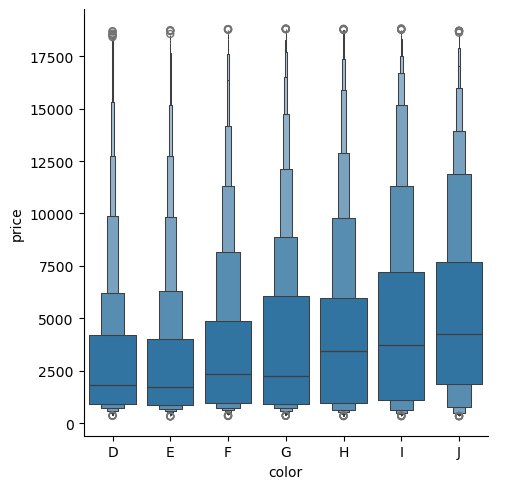

In [14]:
# For large datasets the best suited is the boxenplot()

diamonds = sns.load_dataset("diamonds")
sns.catplot(data=diamonds.sort_values("color"), x="color", y="price", kind="boxen")

### violinplots

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


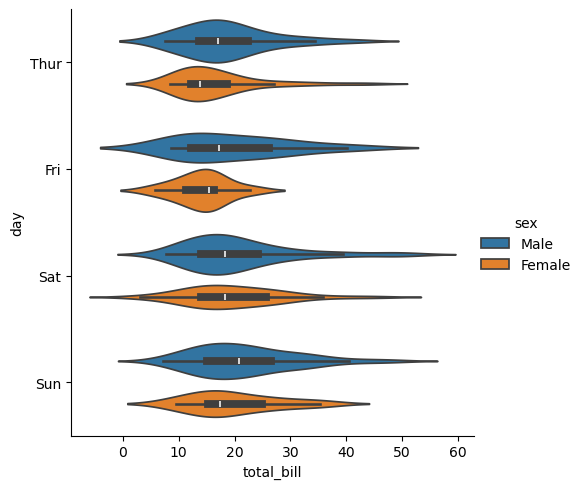

In [15]:
# This combines a boxplot with the kernel density estimation procedure described in the distributions:

sns.catplot(data=tips, x="total_bill", y="day", hue="sex", kind="violin")

- The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


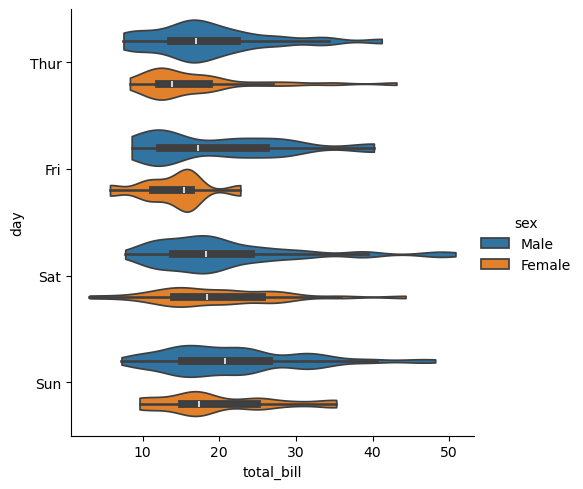

In [16]:
sns.catplot(data=tips, x="total_bill", y="day", hue="sex", kind="violin", bw_adjust=.5, cut=0)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


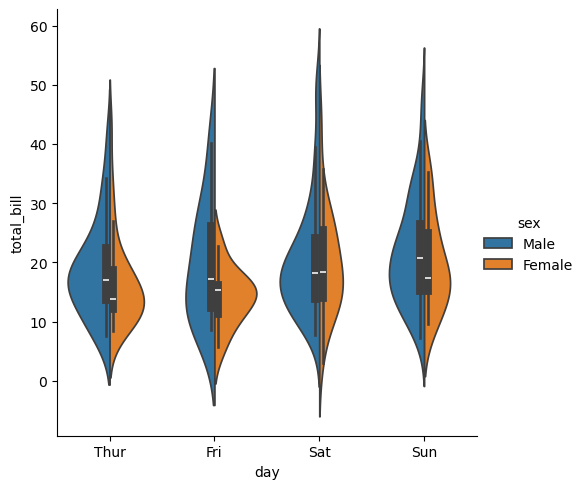

In [18]:
# It is possible to "split" the violins, which can allow for a more efficiant use space:

sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="violin", split="true")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


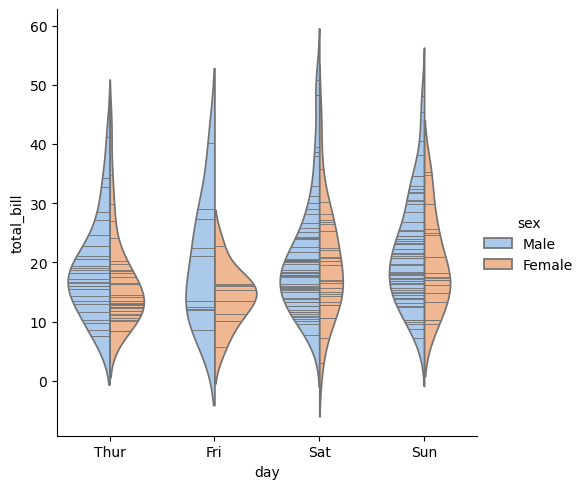

In [19]:
# Using summary boxplot values we can drow on the interios of violins to show individual observations:

sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="violin", inner="stick", split=True, palette="pastel")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='day', ylabel='total_bill'>

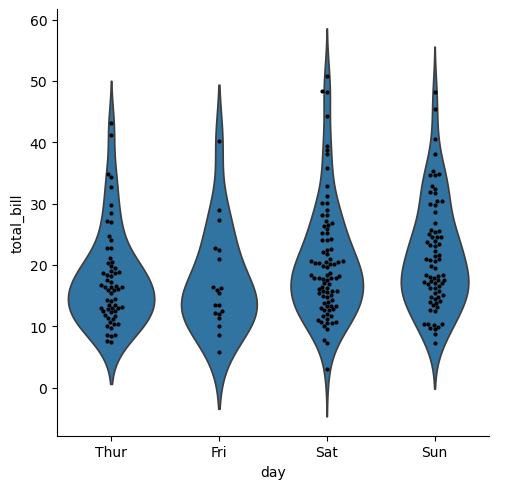

In [21]:
# showing each observation along with a summary of the distribution:

g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

## Estimating central Tendancy

### BarPlots
- When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


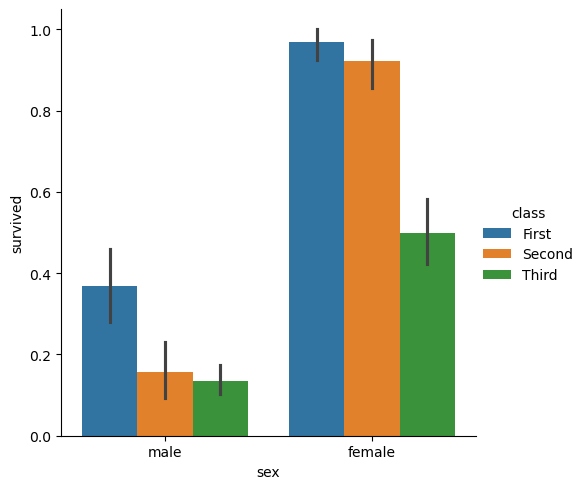

In [22]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


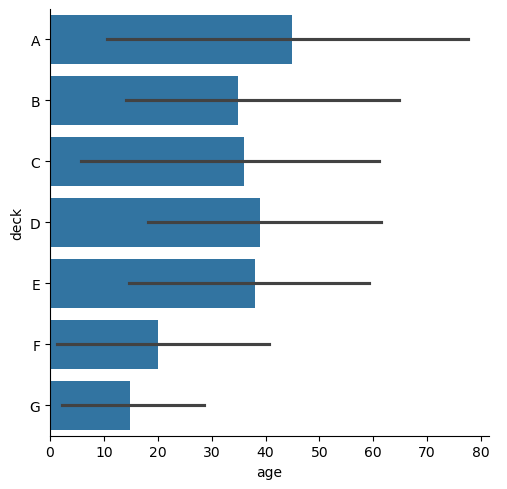

In [23]:
# The default error bars show 95% confidence intervals, but (starting in v0.12), it is possible to select from a number of other representations:

sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


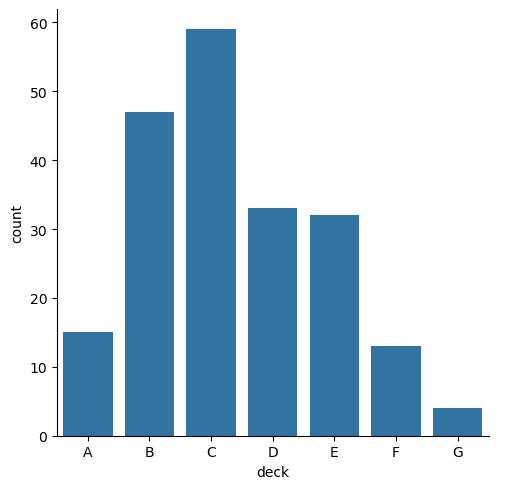

In [24]:
# Barplot to show the number of observations in each category rather than computing a static for a second variable.
# This is similar to a histgram over a categorical rather than quantitative, variable.

sns.catplot(data=titanic, x="deck", kind="count")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


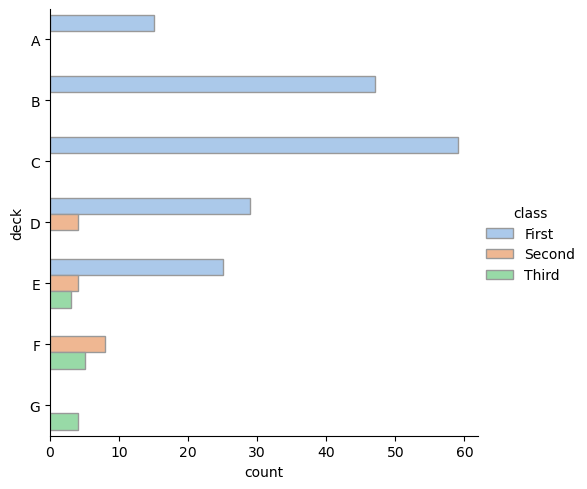

In [25]:
sns.catplot(data=titanic, y="deck", hue="class", kind="count", palette="pastel", edgecolor=".6")

### Point Plots

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


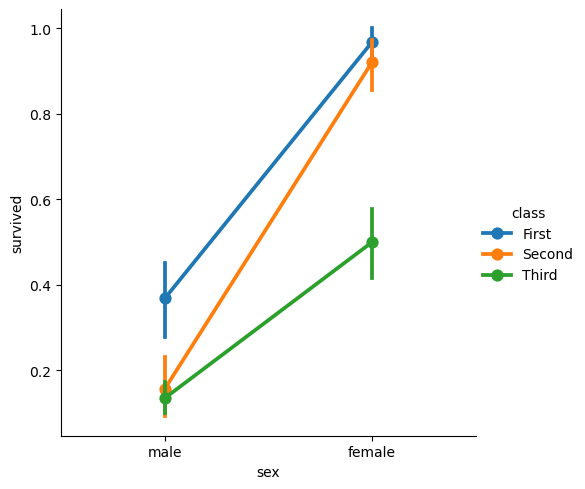

In [27]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


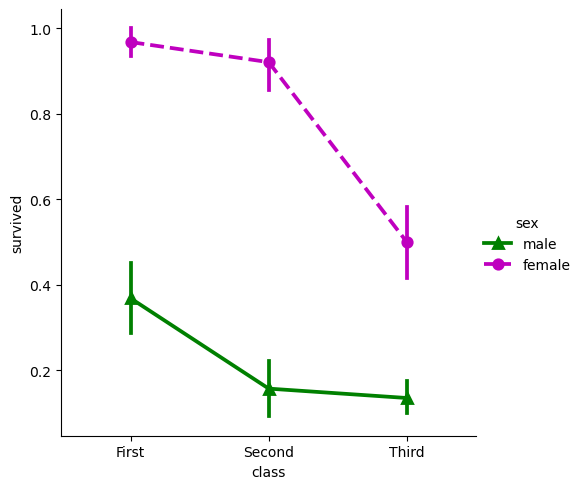

In [28]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex", 
    palette={"male":"g", "female":"m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

## Showing Additional Dimensions

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


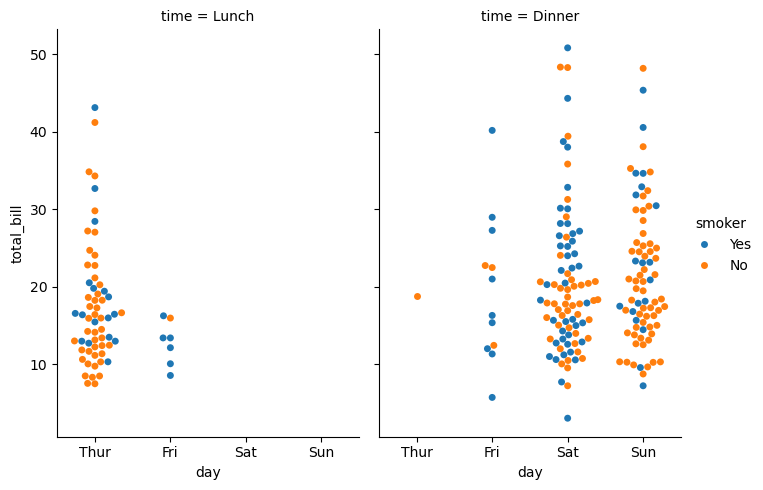

In [29]:
# Since the catplot() is built on FacetGrid() means that it is easy to add faceting variables to visualize higher-dimensional r/ship:

sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",
           kind="swarm", col="time", aspect=.7)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


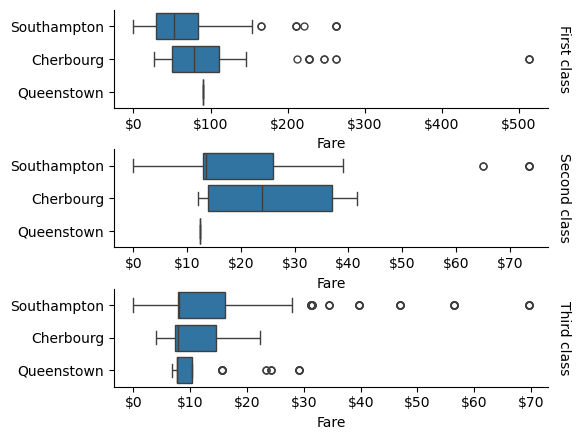

In [32]:
# we can further customize the plot by usng the methods on the FacetGrid objects:

g = sns.catplot(data=titanic, x="fare", y="embark_town", row="class",
               kind="box", orient="h", sharex=False, margin_titles=True,
               height=1.5, aspect=4,)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter("${x:.0f}")